In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [2]:

raw_dataset = pd.read_csv('Dallas data summary Interpolated(6M).csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.tail(20)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
146,5/1/2017,180.64196,4.01,54868.00000,7376.650000,3.6,487373.6517,767.508617,35.17%,140028.3333,1.27%,4995,3.77,222.749667
147,6/1/2017,180.78713,3.90,55117.50000,7386.538250,3.9,489673.0096,768.527900,35.10%,140633.0000,1.20%,5659,3.94,223.125083
148,7/1/2017,181.23406,3.97,55367.00000,7396.426500,3.9,491972.3675,769.547183,34.97%,141250.6667,1.20%,4250,3.76,223.500500
149,8/1/2017,182.28582,3.88,55616.50000,7406.314750,3.9,494271.7254,770.566467,34.83%,141868.3333,1.20%,6620,3.91,223.875917
150,9/1/2017,183.58835,3.81,55866.00000,7416.203000,3.5,496571.0833,771.585750,34.70%,142486.0000,1.20%,4446,4.15,224.251333
151,10/1/2017,185.27276,3.90,56115.50000,7426.091250,3.3,498870.4413,772.605033,34.63%,143060.0000,1.27%,6459,4.03,224.626750
152,11/1/2017,186.42279,3.92,56365.00000,7435.979500,3.4,501169.7992,773.624317,34.57%,143634.0000,1.33%,3754,3.73,225.002167
153,12/1/2017,187.15900,3.95,56614.50000,7445.867750,3.3,503469.1571,774.643600,34.50%,144208.0000,1.40%,3631,3.54,225.377583
154,1/1/2018,187.50014,4.03,56864.00000,7455.756000,3.7,505768.5150,773.834725,34.57%,144725.6667,1.37%,5687,3.46,225.753000
155,2/1/2018,187.43342,4.33,57019.08333,7465.537667,3.7,507276.3032,773.025850,34.63%,145243.3333,1.33%,3979,3.59,226.013667


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,121.62157,5.93,37170.0,5816.4070,5.3,284456.5080,1309.5483,133706.0000,4281,4.19,188.90,43.20,2.3
1,4/1/2005,121.66380,5.86,37443.3,5834.7074,5.1,286767.0694,1303.3853,133866.0000,5548,4.69,189.67,43.27,2.3
2,5/1/2005,122.11284,5.72,37716.6,5853.0078,5.1,289077.6308,1297.2223,134026.0000,4878,4.58,190.44,43.33,2.3
3,6/1/2005,122.20399,5.58,37989.9,5871.3082,5.4,291388.1922,1291.0593,134186.0000,5304,4.83,191.21,43.40,2.3
4,7/1/2005,121.91083,5.70,38263.2,5889.6086,5.4,293698.7536,1284.8963,134134.6667,5140,5.06,191.98,43.40,2.3


In [4]:
features.isna().sum()

Date                                     0
House_Price_Index(S&P/Case-Shiller)      0
Mortgage_Rate (30 yers)                  0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
New_Structures                           0
Economic_Conditions_Index                0
CPI all items less shelter               0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:
features=features.drop('Date',axis=1)
train_dataset = features.iloc[:154]
test_dataset = features.iloc[154:]

In [6]:
train_dataset

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,121.62157,5.93,37170.0,5816.40700,5.3,284456.5080,1309.548300,133706.0000,4281,4.19,188.900000,43.20,2.30
1,121.66380,5.86,37443.3,5834.70740,5.1,286767.0694,1303.385300,133866.0000,5548,4.69,189.670000,43.27,2.30
2,122.11284,5.72,37716.6,5853.00780,5.1,289077.6308,1297.222300,134026.0000,4878,4.58,190.440000,43.33,2.30
3,122.20399,5.58,37989.9,5871.30820,5.4,291388.1922,1291.059300,134186.0000,5304,4.83,191.210000,43.40,2.30
4,121.91083,5.70,38263.2,5889.60860,5.4,293698.7536,1284.896300,134134.6667,5140,5.06,191.980000,43.40,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,182.28582,3.88,55616.5,7406.31475,3.9,494271.7254,770.566467,141868.3333,6620,3.91,223.875917,34.83,1.20
150,183.58835,3.81,55866.0,7416.20300,3.5,496571.0833,771.585750,142486.0000,4446,4.15,224.251333,34.70,1.20
151,185.27276,3.90,56115.5,7426.09125,3.3,498870.4413,772.605033,143060.0000,6459,4.03,224.626750,34.63,1.27
152,186.42279,3.92,56365.0,7435.97950,3.4,501169.7992,773.624317,143634.0000,3754,3.73,225.002167,34.57,1.33


In [7]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index(S&P/Case-Shiller)')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.3500,3.912500,4.430000,5.850000,6.760000
Personal_Income,154.0,45938.311688,5140.283086,37170.0000,41208.437500,45839.166665,50452.250000,56614.500000
Resident_Population,154.0,6643.101334,438.076717,5816.4070,6352.981042,6583.135458,7001.183479,7445.867750
Unemployment_Rate,154.0,5.522078,1.552070,3.3000,4.100000,5.150000,6.775000,8.700000
GDP,154.0,380112.103103,59440.837770,284456.5080,331357.882050,365689.391650,430273.328675,503469.157100
Crime_Rate,154.0,846.791258,213.924261,663.7371,679.451525,752.616733,992.892338,1309.548300
Median_Debt,154.0,133522.149351,3829.751495,127063.0000,130323.500025,134240.500000,136127.499975,144208.000000
New_Structures,154.0,3387.207792,1389.015967,1098.0000,2245.750000,3325.500000,4372.250000,7374.000000
Economic_Conditions_Index,154.0,3.324026,2.089403,-4.4600,3.530000,4.010000,4.405000,5.220000
CPI all items less shelter,154.0,213.928282,10.028485,188.9000,207.413062,219.690250,221.930729,225.377583


In [8]:
train_labels = train_dataset.pop('House_Price_Index(S&P/Case-Shiller)')
test_labels = test_dataset.pop('House_Price_Index(S&P/Case-Shiller)')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.705803,-1.887099,-0.143085,-1.609257,2.163182,0.048006,0.643472,0.414460,-2.495719,0.888291,-0.544667
1,1.051011,-1.652635,-1.845325,-0.271945,-1.570386,2.134372,0.089784,1.555628,0.653763,-2.418938,0.910472,-0.544667
2,0.916107,-1.599467,-1.803551,-0.271945,-1.531514,2.105563,0.131562,1.073272,0.601116,-2.342157,0.929485,-0.544667
3,0.781203,-1.546298,-1.761776,-0.078655,-1.492642,2.076754,0.173340,1.379964,0.720768,-2.265375,0.951667,-0.544667
4,0.896835,-1.493130,-1.720002,-0.078655,-1.453771,2.047945,0.159937,1.261895,0.830847,-2.188594,0.951667,-0.544667
5,1.012467,-1.439962,-1.678227,-0.207515,-1.414899,2.019135,0.146533,1.911276,0.495823,-2.111813,0.951667,-0.544667
6,0.964287,-1.386794,-1.636453,-0.271945,-1.376027,1.990326,0.133129,0.701066,0.510181,-2.035032,0.951667,-0.544667
7,1.253366,-1.333625,-1.594679,-0.465235,-1.337156,1.961517,0.177257,1.027196,0.538897,-1.958250,0.929485,-0.473497
8,1.503902,-1.280457,-1.552904,-0.336375,-1.298284,1.932708,0.221385,0.954483,0.486251,-1.881469,0.910472,-0.412495
9,1.446086,-1.227289,-1.511130,-0.465235,-1.259413,1.903898,0.265513,1.490834,0.476679,-1.804688,0.888291,-0.341325


In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.532745  ],
       [-0.6485871 ],
       [-0.59023285],
       [-0.6264676 ],
       [-0.55066663],
       [-0.72831905],
       [-0.48783755],
       [-0.4741556 ],
       [-0.4264547 ],
       [-0.53420275]], dtype=float32)

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

KeyError: 'val_mae'

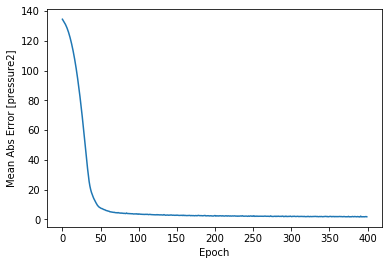

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 4.66
Accuracy: 97.54 %.


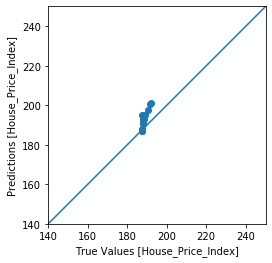

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.85
Accuracy: 98.6 %.


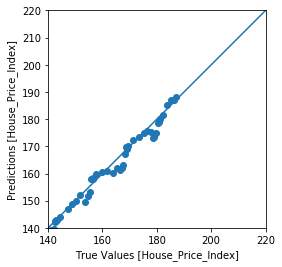

In [16]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [17]:
prediction_features=features   #produce prediction result
prediction_features

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,121.62157,5.93,37170.00000,5816.407000,5.3,284456.5080,1309.548300,133706.0000,4281,4.19,188.900000,43.20,2.3
1,121.66380,5.86,37443.30000,5834.707400,5.1,286767.0694,1303.385300,133866.0000,5548,4.69,189.670000,43.27,2.3
2,122.11284,5.72,37716.60000,5853.007800,5.1,289077.6308,1297.222300,134026.0000,4878,4.58,190.440000,43.33,2.3
3,122.20399,5.58,37989.90000,5871.308200,5.4,291388.1922,1291.059300,134186.0000,5304,4.83,191.210000,43.40,2.3
4,121.91083,5.70,38263.20000,5889.608600,5.4,293698.7536,1284.896300,134134.6667,5140,5.06,191.980000,43.40,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,188.53544,4.55,57949.58333,7524.227667,3.6,516323.0322,768.172600,149232.3333,5416,4.18,227.577667,34.43,1.1
162,189.08054,4.63,58104.66667,7534.009333,3.4,517830.8203,767.363725,150174.0000,4336,4.02,227.838333,34.40,1.1
163,190.31511,4.83,58259.75000,7543.791000,3.3,519338.6085,766.554850,150611.3333,4505,4.09,228.099000,34.27,1.1
164,191.29702,4.87,58414.83333,7553.572667,3.2,520846.3967,765.745975,151048.6667,4920,4.05,228.359667,34.13,1.1


In [18]:
prediction_features.pop('House_Price_Index(S&P/Case-Shiller)')
normed_prediction_features=norm(prediction_features)
prediction_result=model.predict(normed_prediction_features)
prediction_result=pd.DataFrame(prediction_result)
rawdataset=raw_dataset.join(prediction_result)
rawdataset                              

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,0
0,3/1/2005,121.62157,5.93,37170.00000,5816.407000,5.3,284456.5080,1309.548300,43.20%,133706.0000,2.30%,4281,4.19,188.900000,121.882484
1,4/1/2005,121.66380,5.86,37443.30000,5834.707400,5.1,286767.0694,1303.385300,43.27%,133866.0000,2.30%,5548,4.69,189.670000,122.925049
2,5/1/2005,122.11284,5.72,37716.60000,5853.007800,5.1,289077.6308,1297.222300,43.33%,134026.0000,2.30%,4878,4.58,190.440000,121.840736
3,6/1/2005,122.20399,5.58,37989.90000,5871.308200,5.4,291388.1922,1291.059300,43.40%,134186.0000,2.30%,5304,4.83,191.210000,118.549553
4,7/1/2005,121.91083,5.70,38263.20000,5889.608600,5.4,293698.7536,1284.896300,43.40%,134134.6667,2.30%,5140,5.06,191.980000,116.806557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,8/1/2018,188.53544,4.55,57949.58333,7524.227667,3.6,516323.0322,768.172600,34.43%,149232.3333,1.10%,5416,4.18,227.577667,193.046249
162,9/1/2018,189.08054,4.63,58104.66667,7534.009333,3.4,517830.8203,767.363725,34.40%,150174.0000,1.10%,4336,4.02,227.838333,195.032211
163,10/1/2018,190.31511,4.83,58259.75000,7543.791000,3.3,519338.6085,766.554850,34.27%,150611.3333,1.10%,4505,4.09,228.099000,197.543015
164,11/1/2018,191.29702,4.87,58414.83333,7553.572667,3.2,520846.3967,765.745975,34.13%,151048.6667,1.10%,4920,4.05,228.359667,200.419693


In [19]:
rawdataset.to_csv('prediction-result.csv',index = False, header=True)